<a href="https://colab.research.google.com/github/saichandu04/Computer-vision-files/blob/main/diamond_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diamond Price Prediction
#### Building KNN Model.
#### Serialization & De-Serialization for creating the application of the ML model.

### Data Description:
1. Title : Diamonds Dataset

2. the 7th column "price" is the values to be predicted.

3. Data Type : Mixed ( Numerical + Categorical)
	
4. Dataset has nearly 54000 instances.

5. It has 10 features.

6. Features 

	price : price in US dollars (\$326--\$18,823)

	carat : weight of the diamond (0.2--5.01)

	cut   : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

	color : diamond colour, from J (worst) to D (best)

	clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

	x : length in mm (0--10.74)

	y : width in mm (0--58.9)

	z : depth in mm (0--31.8)

	depth : total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

	table : width of top of diamond relative to widest point (43--95)

7. Caution : Handle Categorical data before building a model. 

### Business Understanding
Diamond is one of the strongest and the most valuable substances produced naturally as a form of carbon. However, unlike gold and silver, determining the price of a diamond is very complex because many features are to be considered for determining its price.<br>

The value of diamonds depends upon their structure, cut, inclusions (impurity), carats, and many other features. The uses of diamonds are many, such as in industries, as they are effective in cutting, polishing, and drilling. Since diamonds are extremely valuable, they have been traded across different countries for centuries now and this trade only increases with time. They are graded and certified based on the "four Cs", which are color, cut, clarity, and carat. These are the only metrics that are being used to the quality of diamonds and sets the price of the diamond. This metric allows uniform understanding for people across the world to buy diamonds, which allows ease of trade and value for what is purchased.

### Understanding the 4 C's

* Cut
* Color
* Clarity
* Carat

Credits - https://www.brides.com/story/choosing-engagement-ring-four-cs


![image.png](attachment:image.png) ![image-3.png](attachment:image-3.png) ![image-4.png](attachment:image-4.png) ![image-5.png](attachment:image-5.png)

### Load Data

In [10]:
# Importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Loading dataset
df = pd.read_csv("/content/diamonds.csv")

In [12]:
# First 3 columns
df.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31


In [13]:
# Shape of data
df.shape

(23072, 10)

In [14]:
# Renaming columns
df.rename(columns={'x':'length', 'y':'width', 'z':'depth', 'depth':'depth%'}, inplace = True)

In [15]:
# Creating Target column seperately to concat it at the end of the columns
df_target = df[['price']]
df_target.head(3)

,price
0,326.0
1,326.0
2,327.0


In [16]:
# Dropping the Target column
df = df.drop('price', axis = 1)
df.head(3)

,carat,cut,color,clarity,depth%,table,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31


In [17]:
# Concating Target column at the end of the columns
df = pd.concat([df, df_target], axis = 1)
df.head(3)

,carat,cut,color,clarity,depth%,table,length,width,depth,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326.0
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326.0
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327.0


In [18]:
# Shape of data
df.shape

(23072, 10)

### EDA

In [19]:
# Description of data
df.describe()

,carat,depth%,table,length,width,depth,price
count,23072.000000,23072.000000,23072.000000,23071.000000,23071.000000,23071.000000,23071.000000
mean,1.003604,61.810133,57.753056,6.313745,6.312983,3.900333,5089.979975
std,0.337976,1.535700,2.215474,0.821008,0.810282,0.511931,2541.164587
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.900000,61.000000,56.000000,6.070000,6.070000,3.750000,3482.500000
50%,1.010000,61.900000,58.000000,6.440000,6.440000,3.990000,4752.000000
75%,1.190000,62.600000,59.000000,6.770000,6.770000,4.180000,6653.000000
max,3.110000,71.800000,70.000000,9.540000,9.380000,5.980000,11104.000000


In [20]:
# There are missing values assigned as 0 in columns
df[['length','width','depth']][(df['length']==0) | (df['width']==0) | (df['depth']==0)]

,length,width,depth
2207,6.55,6.48,0.0
2314,6.66,6.60,0.0
4791,6.50,6.47,0.0
5471,6.50,6.47,0.0
10167,7.15,7.04,0.0
11182,0.00,6.62,0.0
11963,0.00,0.00,0.0
13601,6.88,6.83,0.0
15951,0.00,0.00,0.0


In [21]:
# Replacing 0 (missing values) with Null values (np.NaN).
df[['length','width','depth']] = df[['length','width','depth']].replace(0, np.NaN)

In [22]:
# Checking Null Values
df.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth%      0
table       0
length      4
width       3
depth      10
price       1
dtype: int64

In [23]:
# Dropping Null Values
df.dropna(inplace = True)

In [24]:
# Rechecking Null Values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth%     0
table      0
length     0
width      0
depth      0
price      0
dtype: int64

In [25]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23062 entries, 0 to 23070
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    23062 non-null  float64
 1   cut      23062 non-null  object 
 2   color    23062 non-null  object 
 3   clarity  23062 non-null  object 
 4   depth%   23062 non-null  float64
 5   table    23062 non-null  float64
 6   length   23062 non-null  float64
 7   width    23062 non-null  float64
 8   depth    23062 non-null  float64
 9   price    23062 non-null  float64
dtypes: float64(7), object(3)
memory usage: 1.9+ MB


In [26]:
# Shape of data
df.shape

(23062, 10)

**Observation:** There are no Null Values in our DataFrame.

### Univariate Analysis on Continous Variables:

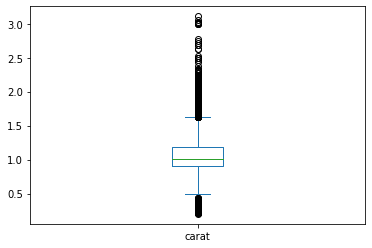

In [27]:
# Carat Column
df['carat'].plot.box()

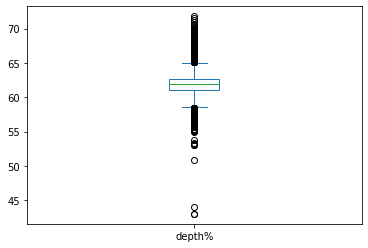

In [28]:
# Depth% Column
df['depth%'].plot.box()

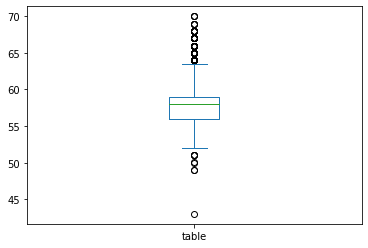

In [29]:
# Table Column
df['table'].plot.box()

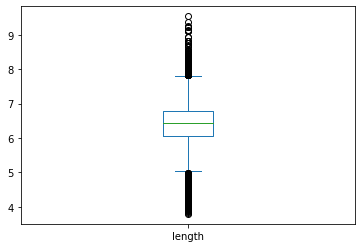

In [30]:
# Length Column
df['length'].plot.box()

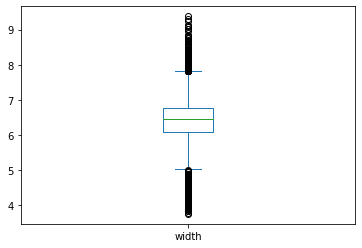

In [31]:
# Width Column
df['width'].plot.box()

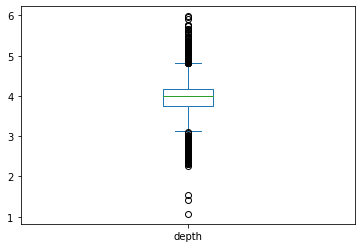

In [32]:
# Depth Column
df['depth'].plot.box()

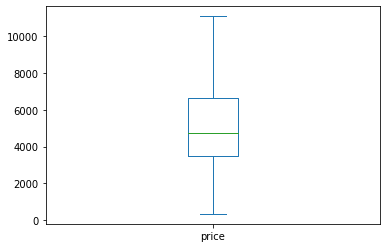

In [33]:
# Price Column
df['price'].plot.box()

### Univariate Analysis on Categorical Variable:

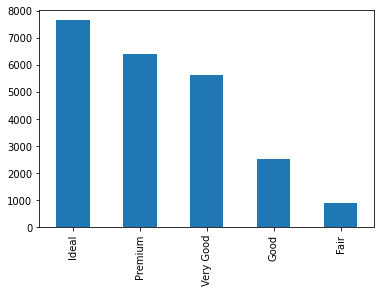

In [34]:
# BARPLOT for CUT
df['cut'].value_counts().plot.bar()

cut : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

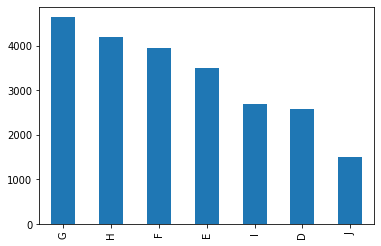

In [35]:
# BARPLOT for COLOR
df['color'].value_counts().plot.bar()

color : diamond colour, from J (worst) to D (best)

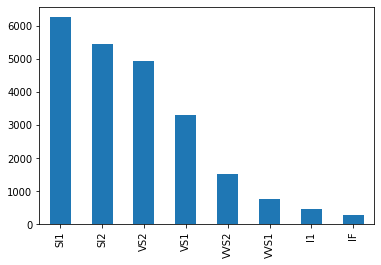

In [36]:
# BARPLOT for CLARITY
df['clarity'].value_counts().plot.bar()

clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

### Bivariate Analysis on Numerical- Numerical Variables:

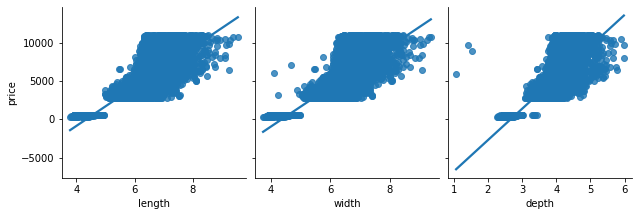

In [37]:
# Pairplot
g= sns.pairplot(df , height=3, aspect =1, x_vars = ['length','width','depth'] , y_vars =  ['price'] , kind = 'reg')

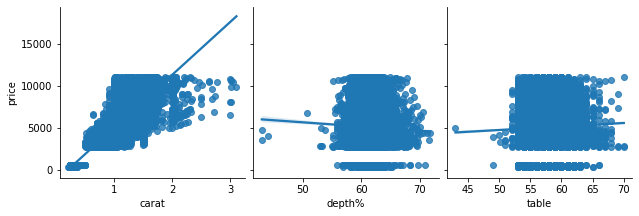

In [38]:
# Pairplot
g= sns.pairplot(df , height=3, aspect =1, x_vars = ['carat','depth%', 'table'] , y_vars =  ['price'] , kind = 'reg')

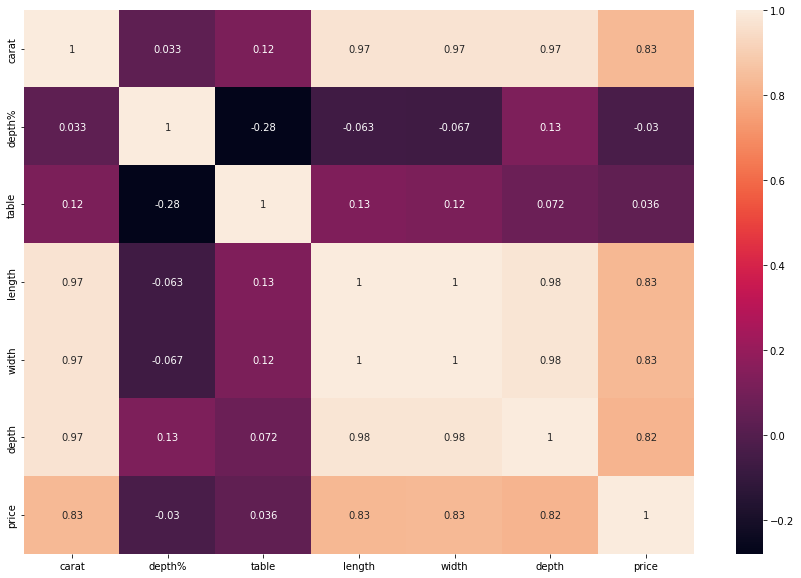

In [39]:
# Heatmap
corr = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr , xticklabels=corr.columns , yticklabels=corr.columns , annot=True)

#### There is a high correlation between carat, length, width, depth and price.

### Bivariate Analysis on Categorical - Continous Variables:

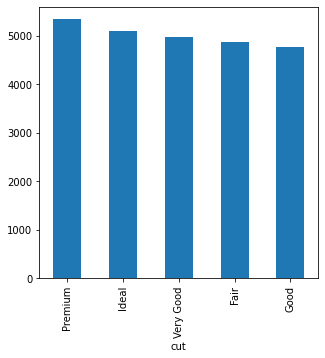

In [40]:
# BARPLOT for Cut and Price
fig, ax = plt.subplots(figsize=(5,5))
df.groupby('cut')['price'].mean().sort_values(ascending = False).plot.bar()

cut : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

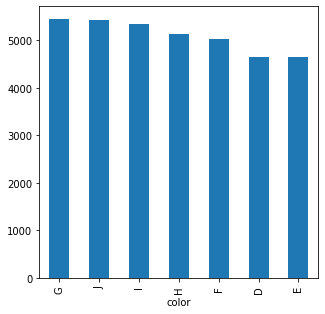

In [41]:
# BARPLOT for Color and Price
fig, ax = plt.subplots(figsize=(5,5))
df.groupby('color')['price'].mean().sort_values(ascending = False).plot.bar()

color : diamond colour, from J (worst) to D (best)

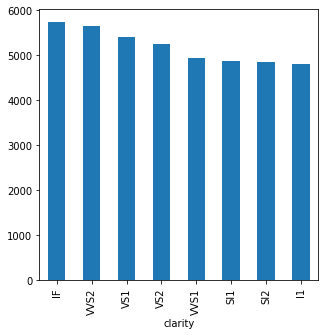

In [42]:
# BARPLOT for Clarity and Price
fig, ax = plt.subplots(figsize=(5,5))
df.groupby('clarity')['price'].mean().sort_values(ascending = False).plot.bar()

clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

#### Splitting the Target and Independent Columns

In [43]:
X = df[['carat', 'cut', 'color', 'clarity', 'length', 'width', 'depth']]  #.drop('price', axis = 1)

In [44]:
y = df[['price']]

In [45]:
X.head()

,carat,cut,color,clarity,length,width,depth
0,0.23,Ideal,E,SI2,3.95,3.98,2.43
1,0.21,Premium,E,SI1,3.89,3.84,2.31
2,0.23,Good,E,VS1,4.05,4.07,2.31
3,0.29,Premium,I,VS2,4.20,4.23,2.63
4,0.31,Good,J,SI2,4.34,4.35,2.75


In [46]:
y.head()

,price
0,326.0
1,326.0
2,327.0
3,334.0
4,335.0


### Splitting Data into Train and Test

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4)
print('Train Set: ', X_train.shape, y_train.shape)
print('Test Set: ', X_test.shape, y_test.shape)

Train Set:  (17296, 7) (17296, 1)
Test Set:  (5766, 7) (5766, 1)


In [48]:
X_train.head(3)

,carat,cut,color,clarity,length,width,depth
3062,0.62,Ideal,G,IF,5.45,5.48,3.38
19437,1.04,Very Good,F,VS1,6.49,6.54,4.01
5722,0.25,Very Good,E,VVS2,3.97,4.01,2.53


In [49]:
X_test.head(3)

,carat,cut,color,clarity,length,width,depth
1985,0.70,Very Good,E,VS1,5.63,5.67,3.58
19280,1.06,Premium,G,VVS2,6.61,6.65,3.95
6555,1.11,Ideal,J,SI2,6.64,6.60,4.14


### Label Encoding

In [50]:
# Importing LabelEncoder Module
from sklearn.preprocessing import LabelEncoder

In [51]:
# label encoding the train set categorical columns
le = LabelEncoder()
X_train['cut']=le.fit_transform(X_train['cut'])
X_train['color']=le.fit_transform(X_train['color'])
X_train['clarity']=le.fit_transform(X_train['clarity'])

In [52]:
# label encoding the test set categorical columns
le= LabelEncoder()
X_test['cut']=le.fit_transform(X_test['cut'])
X_test['color']=le.fit_transform(X_test['color'])
X_test['clarity']=le.fit_transform(X_test['clarity'])

In [53]:
X_train.head(3)

,carat,cut,color,clarity,length,width,depth
3062,0.62,2,3,1,5.45,5.48,3.38
19437,1.04,4,2,4,6.49,6.54,4.01
5722,0.25,4,1,7,3.97,4.01,2.53


In [54]:
X_test.head(3)

,carat,cut,color,clarity,length,width,depth
1985,0.70,4,1,4,5.63,5.67,3.58
19280,1.06,3,3,7,6.61,6.65,3.95
6555,1.11,2,6,3,6.64,6.60,4.14


### Standardization

#### Data Pre-processing on Training Data

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_rescaled = pd.DataFrame(scaler.fit_transform(X_train),
                                columns = X_train.columns,
                                index = X_train.index)
X_train_rescaled.head()

,carat,cut,color,clarity,length,width,depth
3062,-1.131550,-0.533483,0.113950,-1.632967,-1.053615,-1.028292,-1.026929
19437,0.106984,1.305873,-0.465892,0.256798,0.214436,0.279580,0.213286
5722,-2.222640,1.305873,-1.045734,2.146564,-2.858151,-2.842039,-2.700234
16287,0.018518,1.305873,-1.045734,0.886720,0.019352,-0.016542,0.193600
21085,0.283918,1.305873,0.113950,1.516642,0.336365,0.439980,0.331401


#### Data Pre-processing on Testing Data

In [56]:
X_test_rescaled = pd.DataFrame(scaler.transform(X_test),
                               columns = X_test.columns,
                               index = X_test.index)
X_test_rescaled.head()

,carat,cut,color,clarity,length,width,depth
1985,-0.895639,1.305873,-1.045734,0.256798,-0.834145,-0.793862,-0.633210
19280,0.165962,0.386195,0.113950,2.146564,0.360750,0.415303,0.095170
6555,0.313407,-0.533483,1.853476,-0.373124,0.397329,0.353611,0.469203
16227,0.018518,0.386195,-1.045734,0.886720,0.092508,0.143858,0.193600
22006,0.755740,0.386195,-0.465892,0.256798,0.750920,0.674410,0.823550


### Creating Models

#### Linear Regression

In [57]:
#Importing LinearRegression from sklearn.linear_model module
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_rescaled, y_train)

LinearRegression()

In [58]:
# Make prediction on test set
y_test_pred = linear_regressor.predict(X_test_rescaled)

In [59]:
# Calculate Accuracy of predictions
from sklearn import metrics
print("R2 Score: " , metrics.r2_score(y_test, y_test_pred))
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error: " , np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R2 Score:  0.7901499435259961
Mean Absolute Error:  870.726061515566
Mean Squared Error:  1335150.9368695968
Root Mean Squared Error:  1155.4873157545248


#### KNN Regression

In [60]:
#Importing KNN regression from sklearn.neighbours module
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train_rescaled, y_train)

KNeighborsRegressor()

In [61]:
# Make prediction on test set
y_test_pred = knn_regressor.predict(X_test_rescaled)

In [62]:
# Calculate Accuracy of predictions
from sklearn import metrics
print("R2 Score: " , metrics.r2_score(y_test, y_test_pred))
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error: " , np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R2 Score:  0.9521894639246722
Mean Absolute Error:  363.8945195976413
Mean Squared Error:  304189.968331599
Root Mean Squared Error:  551.5341950700781


#### Decision Tree Regression

In [63]:
# Importing Decision Tree Regression from sklearn.tree module
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train_rescaled, y_train)

DecisionTreeRegressor()

In [64]:
# Make prediction on test set
y_test_pred = dt_regressor.predict(X_test_rescaled)

In [65]:
# Calculate Accuracy of predictions
from sklearn import metrics
print("R2 Score: " , metrics.r2_score(y_test, y_test_pred))
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error: " , np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R2 Score:  0.9256290689025997
Mean Absolute Error:  451.33047173083594
Mean Squared Error:  473177.9442854665
Root Mean Squared Error:  687.8793093889847


#### Random Forest Regression

In [66]:
# Importing Random Forest Regression from sklearn.ensemble module
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train_rescaled, y_train)

RandomForestRegressor()

In [67]:
# Make prediction on test set
y_test_pred = rf_regressor.predict(X_test_rescaled)

In [68]:
# Calculate Accuracy of predictions
from sklearn import metrics
print("R2 Score: ", metrics.r2_score(y_test, y_test_pred))
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_test_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R2 Score:  0.9589914659067015
Mean Absolute Error:  340.17925260558616
Mean Squared Error:  260912.8805314333
Root Mean Squared Error:  510.7963200057664


#### Therefore, the accuracy of the Random Forest Regression model is higher compared to the other models.

### Saving the Model (Serialization)

In [74]:
from pickle import dump

dump(le, open('/content/dt_model.pkl', 'wb'))
dump(scaler, open('/content/standard_scaler.pkl', 'wb'))
dump(linear_regressor, open('/content/lr_model.pkl', 'wb'))
dump(knn_regressor, open('/content/knn_model.pkl', 'wb'))
dump(dt_regressor, open('/content/dt_model.pkl', 'wb'))
dump(rf_regressor, open('/content/rf_model.txt', 'wb'))

### Productionisation (Deserialization)

In [77]:
from pickle import load

le = load(open('/content/label_encoder.pkl', 'rb'))
scaler = load(open('/content/standard_scaler.pkl', 'rb'))
linear_regressor = load(open('/content/lr_model.pkl', 'rb'))
knn_regressor = load(open('/content/knn_model.pkl', 'rb'))
dt_regressor = load(open('/content/dt_model.pkl', 'rb'))
rf_regressor = load(open('/content/lr_model.pkl', 'rb'))

### Production Ready Code

In [81]:
print("Enter Diamond Details")

Enter Diamond Details
